Referência: https://en.wikipedia.org/wiki/Ordinary_least_squares


---

Em estatística, mínimos quadrados ordinários (ordinary least squares - OLS) ou mínimos quadrados lineares é um método para estimar os parâmetros desconhecidos em um modelo de regressão. Este método escolhe os parâmetros de uma função linear de um conjunto de variáveis pela minimização da soma da diferença dos quadrados entre o valor observado das variáveis dependentes no conjunto de dados e o valor predito pela função linear. OLS é usado em campos diversos, como economia, ciências políticas, psicologia e engenharia.


---

Modelo Linear

Suponha que os dados consistem de $n$ observações $\{y_i, x_i\}^n_i=1$. Cada observação $i$ inclúi uma resposta escalar $y_i$ e um vetor de valores de $p$ preditores (regressores) $x_{ij}$ para $j=1..p$. No modelo de regressão linear, a variável de resposta $y_i$ é uma função linear dos regressores: 

$y_i = \beta_1 x_{i1} + \beta_2 x_{i2} + . . . + \beta_p x_{ip} + \epsilon_i$,

ou na forma vetorial,

$y_i = x_i^T \beta + \epsilon_i$,

onde $\beta$ é um vetor coluna de dimensão $p$ com os parâmetros desconhecidos, $\epsilon_i$ são os escalares não observados representado os erros (variável aleatória) que é o responsável pela discrepância entre a resposta verdadeira os valores preditos $x_i \beta_i$, o mesmo problema pode ser expresso na seguinte forma matricial:

$y = X^T \beta + \epsilon$.

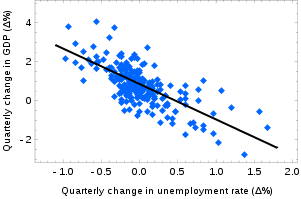
Lei de Okun em macroeconomia diz que o crescimento do PIB de uma economia deveria depender linearmente de mudanças na taxa de desemprego. Aqui o OLS é usado para construir um regressor linear descrevendo esta lei.


---

Abordagem geométrica

Para o matemático, OLS é uma solução aproximada para um sistema superdeterminado de equações lineares $X\beta \approx y$. Supondo que o sistema não tem solução exata, estamos olhando para uma solução que prove a menor discrepância. Em outras palavras, estamos procurando soluções que satisfaça:

$\hat{\beta} = argmin_x || y - X\beta ||$.


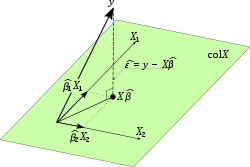
A estimação do OLS pode ser vista como uma projeção em um espaço linear coberto pelos regressores. 
OLS estimation can be viewed as a projection onto the linear space spanned by the regressors. (Aqui cada $X_1$ e $X_2$ referense a uma coluna da matriz de dados.



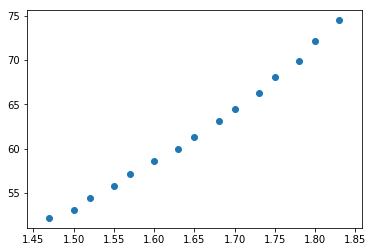

In [21]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

height = np.array( [1.47, 1.50, 1.52, 1.55, 1.57, 1.60, 1.63, 1.65, 1.68, 1.70, 1.73, 1.75, 1.78, 1.80, 1.83] )
weight = np.array( [52.21, 53.12, 54.48, 55.84, 57.20, 58.57, 59.93, 61.29, 63.11, 64.47, 66.28, 68.10, 69.92, 72.19, 74.46] )


plt.scatter(height, weight)
plt.show()
# plotando os dados

In [22]:
# montando a matriz de dados usada no sistema linear
A = np.ones((len(height), 2))
A[:, 0] = height

print(A)

[[1.47 1.  ]
 [1.5  1.  ]
 [1.52 1.  ]
 [1.55 1.  ]
 [1.57 1.  ]
 [1.6  1.  ]
 [1.63 1.  ]
 [1.65 1.  ]
 [1.68 1.  ]
 [1.7  1.  ]
 [1.73 1.  ]
 [1.75 1.  ]
 [1.78 1.  ]
 [1.8  1.  ]
 [1.83 1.  ]]


In [23]:
# calculando a pseudo-inversa da matriz A
p_A = np.linalg.pinv(A)
print(p_A)
print(p_A.shape)
print(weight.shape)

[[-0.98890673 -0.82469712 -0.71522405 -0.55101445 -0.44154138 -0.27733178
  -0.11312217 -0.0036491   0.1605605   0.27003357  0.43424318  0.54371625
   0.70792585  0.81739892  0.98160852]
 [ 1.69902204  1.42796672  1.24726317  0.97620785  0.79550431  0.52444899
   0.25339367  0.07269012 -0.1983652  -0.37906875 -0.65012407 -0.83082762
  -1.10188294 -1.28258648 -1.5536418 ]]
(2, 15)
(15,)



agora resolvo o sistema multiplicando $\beta = Y * X^{-1}$


In [24]:
beta = np.matmul(p_A, weight)
print(beta)
#print(np.matmul(weight, p_A))

[ 61.27218654 -39.06195592]


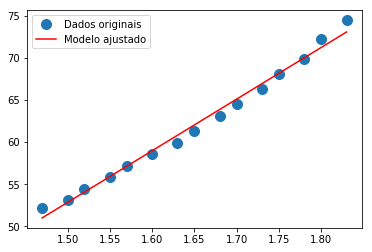

In [25]:
# plotando resultado junto com os dados

plt.plot(height, weight, 'o', label='Dados originais', markersize=10)
plt.plot(height, beta[0]*height + beta[1], 'r', label='Modelo ajustado')
plt.legend()
plt.show()
